<a href="https://colab.research.google.com/github/thofes/SJ_distance/blob/main/Vorselektion_Mark2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connect GDrive
from google.colab import drive
drive.mount('/content.gdrive')

#init Repository - YOLOv5
%cd /content


!git clone https://github.com/thofes/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

Mounted at /content.gdrive
/content
Cloning into 'yolov5'...
remote: Enumerating objects: 13881, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 13881 (delta 2), reused 0 (delta 0), pack-reused 13875
Receiving objects: 100% (13881/13881), 25.92 MiB | 11.55 MiB/s, done.
Resolving deltas: 100% (9414/9414), done.
/content/yolov5
     |████████████████████████████████| 1.6 MB 26.7 MB/s 


In [7]:
#to compare

Labels = { '29':'Cam1_0158', '30':'Cam1_0157', '31':'Cam1_0173/Cam4_0173', '32':'Cam1_0166/Cam4_0166', '33':'Cam4_0196', '34':'Cam3_0198/Cam4_0198', '35':'Cam3_0219', '36':'Cam3_0215', '42':'Cam1_0170', '43':'Cam1_0151/Cam2_0151', '44':'Cam1_0179/Cam4_178', '45':'Cam1_0196/Cam4_0196', '46':'Cam4_0183', '47':'Cam1_0169/Cam4_0169', '48':'Cam3_0193/Cam4_0193'}
print(Labels['29'])
print(Labels['42'])
td = Labels.keys()
print(list(td)[1])

Cam1_0158
Cam1_0170
30


In [8]:
#manually Detection Yolo

import os

xx = '35'

landing_pic = "/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/" + xx

Path_Result_1 = '/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/' + xx
if os.path.isdir(Path_Result_1):
  print("Path exists")
else:
  os.mkdir(Path_Result_1)
  print("Path was not existing")

Path_Result_2 = '/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/Results/' + xx
if os.path.isdir(Path_Result_2):
  print("Path exists")
else:
  os.mkdir(Path_Result_2)
  print("Path was not existing")


Path_Result_3 = '/content.gdrive/MyDrive/Vorselektion/Landing_Frame_big/Results/' + xx
if os.path.isdir(Path_Result_3):
  print("Path exists")
else:
  os.mkdir(Path_Result_3)
  print("Path was not existing")


x = input ("Enter your confidence threshold: ")
if float(x) > 0 and float(x) < 1:
  print("Confidence Threshold is ", x)
else:
  print("Threshold should be between 0 and 1. Your choice was incorrect so now default threshold is 0.6")
  x = 0.6

name = 'confthres' + str(x)

%cd /content/yolov5
#Skijumper only
#!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt" --name 'org' --save-crop --source {landing_pic} --project {Path_Result_1} --save-txt 
!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt" --name {name} --save-crop --source {landing_pic} --project {Path_Result_1} --save-txt --max-det 1 --conf-thres {x}

#Landing Frame only
#!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_Frame_big/landing_frame_big_best_20_epochs.pt" --name 'org' --save-crop --source {landing_pic} --project {Path_Result_3} --save-txt
!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Landing_Frame_big/landing_frame_big_best_20_epochs.pt" --name {name} --save-crop --source {landing_pic} --project {Path_Result_3} --save-txt --max-det 1 --conf-thres {x}

#Landing and Flight
#!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/best_landing_flight.pt" --name 'org' --save-crop --source {landing_pic} --project {Path_Result_2} --save-txt
!python detect_Auswertung.py --weights "/content.gdrive/MyDrive/Vorselektion/Flight_Landing_big/best_landing_flight.pt" --name {name} --save-crop --source {landing_pic} --project {Path_Result_2} --save-txt --max-det 1 --conf-thres {x}


Path was not existing
Path was not existing
Path was not existing
Enter your confidence threshold: 0.8
Confidence Threshold is  0.8
/content/yolov5
detect_Auswertung: weights=['/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/landing_sequence_big_best_8.pt'], source=/content.gdrive/MyDrive/Vorselektion/B-Hofen_Samples/35, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.8, iou_thres=0.45, max_det=1, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content.gdrive/MyDrive/Vorselektion/Landing_sequence_big/Results/35, name=confthres0.8, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.1-582-g288f8f1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1000 /content.gdrive/MyDr

Enter which Results you want to see: (1 for landing sequence, 2 for landing frame, 3 for landing/flight) 3
Results of the landing frame selection


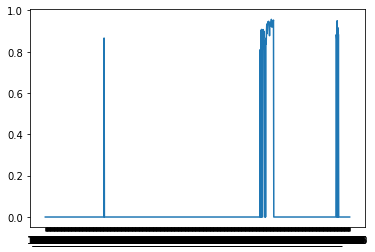

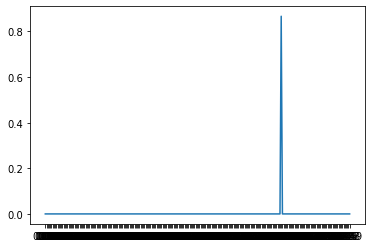

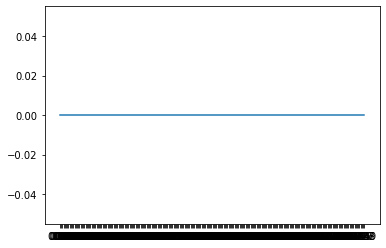

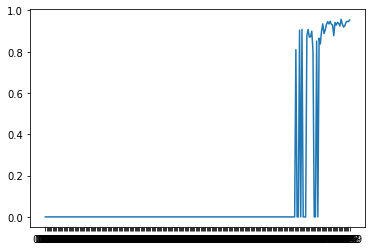

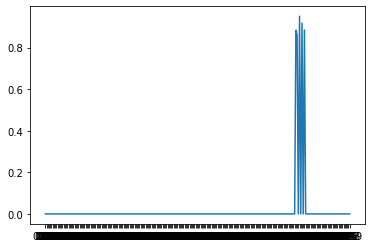

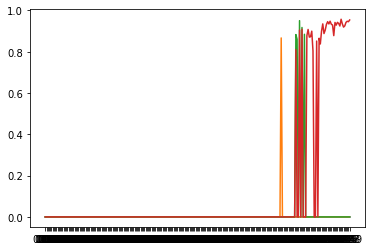

The Preselection would detect the landing in following frame:  3_0242
By manually labeling following frame is the landing:  Cam3_0219


In [11]:
#manually selection 

import json
import numpy as np
import matplotlib.pyplot as plt

x = input ("Enter which Results you want to see: (1 for landing sequence, 2 for landing frame, 3 for landing/flight) ")
if x == '1':
  Path = Path_Result_1
  print("Results of the landing sequence selection")
elif x == '2':
  Path = Path_Result_2
  print("Results of the landing/flight selection")
elif x == '3':
  Path = Path_Result_3
  print("Results of the landing frame selection")
else:
  print("Wrong choise - i show the results of the landing/flight selection")
  Path = Path_Result_3

with open(Path + '/' + name + '/list.json', "r") as fp:
    data = json.load(fp)
  
conf = np.array(data["conf"])
index = np.array(data["index"])
cls = np.array(data["cls"])
x_center = np.array(data["x"])
y_center = np.array(data["y"])

#pics = round((len(index))/4)

with open(Path[:-2] + "results.json", "r") as fp:
    resultdata = json.load(fp)


resultdata["Ordner"].append(xx)
resultdata["SOLL"].append(Labels[xx])

X = index
Y = conf

plt.plot(X, Y)
plt.show()

x1 = []
y1 = []
x2 = []
y2 = []
x3 = []
y3 = []
x4 = []
y4 = []

for i, x in enumerate(index):
    if x[0] == '1':
      y2.append(conf[i])
      x2.append(x[2:])
    elif x[0] == '2':
      y1.append(conf[i])
      x1.append(x[2:])
    elif x[0] == '3':
      y4.append(conf[i])
      x4.append(x[2:])
    elif x[0] == '4':
      y3.append(conf[i])
      x3.append(x[2:])



plt.plot(x2, y2)
plt.show()
plt.plot(x1, y1)
plt.show()
plt.plot(x4, y4)
plt.show()
plt.plot(x3, y3)
plt.show()

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.show()


if 1 in cls:
 
    detections = []
    for i, c in enumerate(cls):
        if c == 0 and cls[i-1] == 1:
            detections.append(index[i])

    print("The Preselection would detect landings in following frames: ", detections)
    resultdata["Selection"].append(detections)

else:
  
    maxindex = np.argmax(conf)
    detection = index[maxindex]  
    print("The Preselection would detect the landing in following frame: ", detection)
    resultdata["Selection"].append(detection)

print("By manually labeling following frame is the landing: ", Labels[xx])




with open(Path[:-2] + "results.json", "w") as fp:
    json.dump(resultdata, fp, indent=4)


In [ ]:
print(index[3][2:])
print(conf[0])
for x in index:
  print(type(x[0]))

Enter which Results you want to see: (1 for landing sequence, 2 for landing frame, 3 for landing/flight) 2
Results of the landing/flight selection
OK
Landing:  4_0196


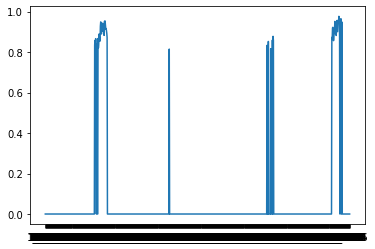

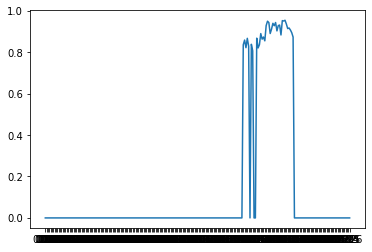

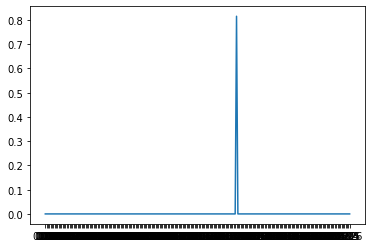

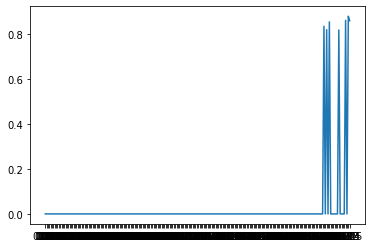

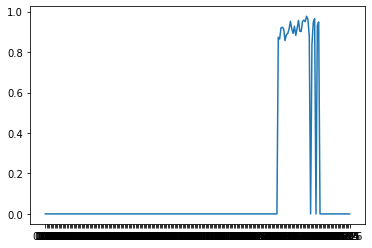

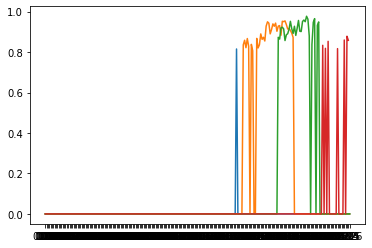

4_0194


In [29]:
#manually selection  TEST

import json
import numpy as np
import matplotlib.pyplot as plt

x = input ("Enter which Results you want to see: (1 for landing sequence, 2 for landing frame, 3 for landing/flight) ")
if x == '1':
  Path = Path_Result_1
  print("Results of the landing sequence selection")
elif x == '2':
  Path = Path_Result_2
  print("Results of the landing/flight selection")
elif x == '3':
  Path = Path_Result_3
  print("Results of the landing frame selection")
else:
  print("Wrong choise - i show the results of the landing/flight selection")
  Path = Path_Result_3

with open(Path + '/' + name + '/list.json', "r") as fp:
    data = json.load(fp)
  
conf = np.array(data["conf"])
index = np.array(data["index"])
cls = np.array(data["cls"])
x_center = np.array(data["x"])
y_center = np.array(data["y"])

if 1 in cls:
  print("OK")
  for i, c in enumerate(cls):
      if c == 0 and cls[i-1] == 1:
        print("Landing: ", index[i])

#print(index)
#print(conf)

X = index
Y = conf

plt.plot(X, Y)
plt.show()

x1 = []
y1 = []
x2 = []
y2 = []
x3 = []
y3 = []
x4 = []
y4 = []

for i, x in enumerate(index):
    if x[0] == '1':
      y2.append(conf[i])
      x2.append(x[2:])
    elif x[0] == '2':
      y1.append(conf[i])
      x1.append(x[2:])
    elif x[0] == '3':
      y4.append(conf[i])
      x4.append(x[2:])
    elif x[0] == '4':
      y3.append(conf[i])
      x3.append(x[2:])



plt.plot(x2, y2)
plt.show()
plt.plot(x1, y1)
plt.show()
plt.plot(x4, y4)
plt.show()
plt.plot(x3, y3)
plt.show()

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.show()


maxindex = np.argmax(conf)
print(index[maxindex])


